In [1]:
# Importar numpy e pandas

In [2]:
import numpy as np
import pandas as pd

In [3]:
# Importe as bibliotecas de visualização e configure %metplotlib inline

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
#Leia o arquivo csv como um dataframe chamado df

In [9]:
df = pd.read_csv('C:/Users/Luanna/Desktop/Desafio/911.csv')

In [10]:
# Verifique a info() do df

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423909 entries, 0 to 423908
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        423909 non-null  float64
 1   lng        423909 non-null  float64
 2   desc       423909 non-null  object 
 3   zip        371780 non-null  float64
 4   title      423909 non-null  object 
 5   timeStamp  423909 non-null  object 
 6   twp        423750 non-null  object 
 7   addr       423909 non-null  object 
 8   e          423909 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 29.1+ MB


In [12]:
# Verifique o cabeçalho do df

In [15]:
df.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [14]:
# Quais são os top 5 CEP nas chamadas 911?

In [16]:
df['zip'].value_counts().head(5)

19401.0    28656
19464.0    27948
19403.0    21631
19446.0    20496
19406.0    14097
Name: zip, dtype: int64

In [17]:
# Quais são os 5 principais municípios das chamadas 911?

In [18]:
df['twp'].value_counts().head(5)

LOWER MERION    36441
ABINGTON        25835
NORRISTOWN      23883
UPPER MERION    22694
CHELTENHAM      19629
Name: twp, dtype: int64

In [19]:
#Dê uma olhada na coluna 'title'. Quantos códigos de títulos exclusivos existem?

In [22]:
df['title'].nunique()

141

In [23]:
# Na coluna 'title' "existem Razões/Departamentos" especificados antes do código do título. Estes são "EMS", 'Fire', e 'Trafic'.
#Use.aply() com uma expressão lambda personalizada para criar uma nova coluna chamada "Razão" que contém o valor de string.

#Por exemplom se o valor da coluna do título dor EMS: BLACK PAINS/ BLESSOR, o valor da coluna seria EMS.

In [24]:
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])

In [25]:
df['Reason']

0             EMS
1             EMS
2            Fire
3             EMS
4             EMS
           ...   
423904    Traffic
423905    Traffic
423906    Traffic
423907    Traffic
423908    Traffic
Name: Reason, Length: 423909, dtype: object

In [26]:
#Qual é o motivo mais comum para uma chamada 911 com base nessa nova coluna?

In [27]:
df['Reason'].value_counts()

EMS        208676
Traffic    151458
Fire        63775
Name: Reason, dtype: int64

In [28]:
#Agora use o Seaborn para criar um countplot de chamadas 911 baseadas nessa nova coluna

<AxesSubplot:xlabel='Reason', ylabel='count'>

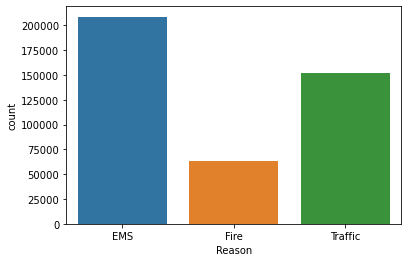

In [32]:
sns.countplot(x='Reason', data=df)

In [33]:
# Agora vamos começar a focar em iformaçções de tempo. Qual é o tipo de dados dos objetos na coluna timeStamp?

In [34]:
type(df['timeStamp'].iloc[1])

str

In [35]:
# Você deveria ter notado que esses timestamps ainda são strings. Use pd.to_datatime para converter a coluna de string
# em objetos DateTime.

In [36]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [37]:
df['timeStamp'].iloc[0]

Timestamp('2015-12-10 17:10:52')

In [40]:
#Você pode usar o método de consuta de funcões do Jupter(tab) para explorar os vários atributos que você pode chamar.
#Agora que a coluna timestamp é realmente objetos DateTime, use .apply() para criar 3 novas colunas chamadas Hour,Month,e 
#Day of Week. Você criará essas colunas com base na coluna timeStamp, consulte as soluções se você ficar preso nesta etapa.

In [41]:
df['Hour'] = df['timeStamp'].apply(lambda x: x.hour)
df['Month'] = df['timeStamp'].apply(lambda x: x.month)
df['Day of Week'] = df['timeStamp'].apply(lambda x: x.dayofweek)

In [45]:
df['Day of Week'].value_counts()

4    65751
2    63423
3    63159
1    63041
0    61318
5    57093
6    50124
Name: Day of Week, dtype: int64

In [44]:
#observe como o dia da semana é um número inteiro de 0-6.Use o .map() com este dicionário para mapear os nomes das 
#sequencias reais para o dia da semana:

In [46]:
dmp = {0:'mon', 1:'Tue', 2:'Wed', 3:'thu', 4:'Fri', 5:'Sat', 6:'Sun'}

In [48]:
df['Day of Week'] = df['Day of Week'].map(dmp)

In [49]:
df['Day of Week']

0         thu
1         thu
2         thu
3         thu
4         thu
         ... 
423904    Fri
423905    Fri
423906    Fri
423907    Fri
423908    Fri
Name: Day of Week, Length: 423909, dtype: object

In [50]:
#Agora use Seaborn para riar um countplot da coluna 'Day of Week' com a tonalidade baseada na coluna Reason

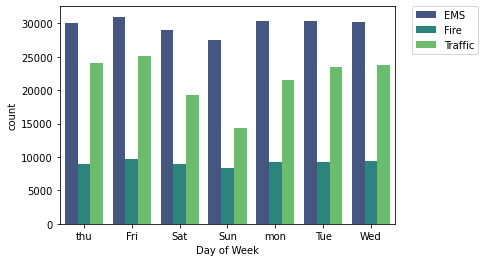

In [53]:
sns.countplot(x='Day of Week', data=df, hue='Reason', palette='viridis')
#código para ajustar as informações de fora do gráfico
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [54]:
#Faça o mesmo para o mês:

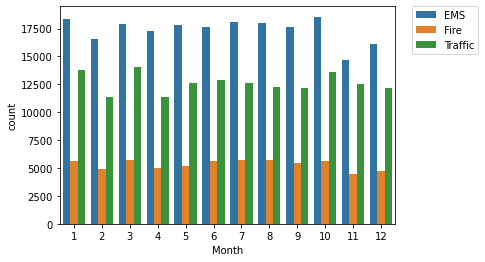

In [56]:
sns.countplot(x='Month', data=df, hue='Reason')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [57]:
#Agora crie um objeto groupby chamado "byMonth", onde você agrupa p DataFrame pela coluna do mes e use o metodo count()
#para agregação.Use o método head() neste Dataframe retornando.

In [61]:
byMonth = df.groupby('Month').count()

In [62]:
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,37824,37824,37824,33480,37824,37824,37812,37824,37824,37824,37824,37824
2,32828,32828,32828,28963,32828,32828,32817,32828,32828,32828,32828,32828
3,37666,37666,37666,33416,37666,37666,37651,37666,37666,37666,37666,37666
4,33583,33583,33583,29488,33583,33583,33575,33583,33583,33583,33583,33583
5,35644,35644,35644,31114,35644,35644,35628,35644,35644,35644,35644,35644


In [63]:
#Agora crie um plot simples fora do DataFrame indicando a contagem de chamadas por mês.

<AxesSubplot:xlabel='Month'>

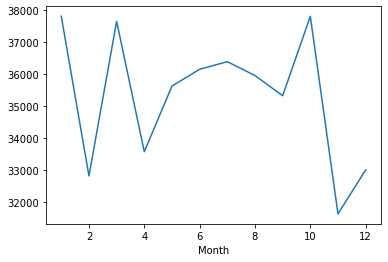

In [65]:
byMonth['twp'].plot()

In [66]:
#Agora veja se você pode usar o iplot() di Seaborn para criar um modelo linear no número de chamadas por mês
#Tenha em mente que talvez seja necessário resetar o indice de uma coluna.

In [67]:
#reseta o DataFrame e transforma o mês em coluna
byMonth.reset_index()

,Month,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
0,1,37824,37824,37824,33480,37824,37824,37812,37824,37824,37824,37824,37824
1,2,32828,32828,32828,28963,32828,32828,32817,32828,32828,32828,32828,32828
2,3,37666,37666,37666,33416,37666,37666,37651,37666,37666,37666,37666,37666
3,4,33583,33583,33583,29488,33583,33583,33575,33583,33583,33583,33583,33583
4,5,35644,35644,35644,31114,35644,35644,35628,35644,35644,35644,35644,35644
5,6,36171,36171,36171,31501,36171,36171,36152,36171,36171,36171,36171,36171
6,7,36405,36405,36405,31863,36405,36405,36391,36405,36405,36405,36405,36405
7,8,35972,35972,35972,31512,35972,35972,35957,35972,35972,35972,35972,35972
8,9,35339,35339,35339,30772,35339,35339,35325,35339,35339,35339,35339,35339
9,10,37815,37815,37815,32919,37815,37815,37809,37815,37815,37815,37815,37815


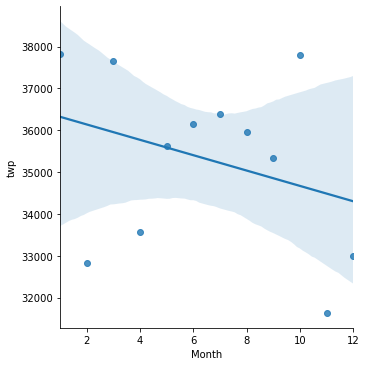

In [68]:
sns.lmplot(x='Month', y='twp', data=byMonth.reset_index())

In [69]:
#Crie uma nova coluna chamada "Data" que contenha a data da coluna timeStamp.Você precisará usar aplicar junto com o 
#método .date()

In [70]:
df['Date'] = df['timeStamp'].apply(lambda x:x.date())

In [71]:
df['Date']

0         2015-12-10
1         2015-12-10
2         2015-12-10
3         2015-12-10
4         2015-12-10
             ...    
423904    2018-11-16
423905    2018-11-16
423906    2018-11-16
423907    2018-11-16
423908    2018-11-16
Name: Date, Length: 423909, dtype: object

In [72]:
#Agora agrupe esta coluna Data com o groupby.Usando o count(), crie um gráfico de contagens de chamadas 911.

<AxesSubplot:xlabel='Date'>

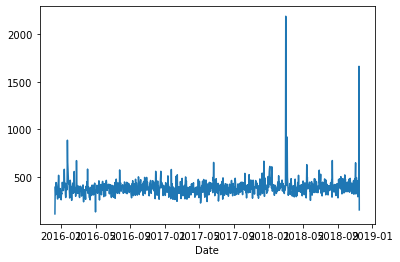

In [74]:
df.groupby('Date').count()['twp'].plot()

In [75]:
#Agora recrie esse plot, mas crie 3 plots separados com cada plot representando uma Razão para a chamada 911.

<AxesSubplot:xlabel='Date'>

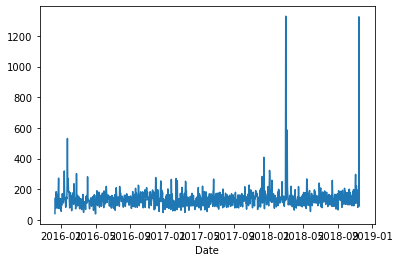

In [76]:
df[df['Reason']=='Traffic'].groupby('Date').count()['twp'].plot()

<AxesSubplot:xlabel='Date'>

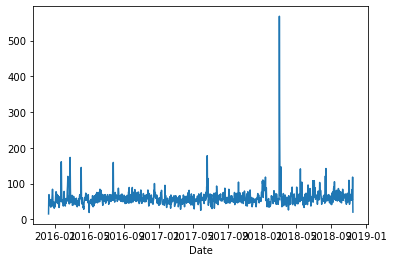

In [77]:
df[df['Reason']=='Fire'].groupby('Date').count()['twp'].plot()

<AxesSubplot:xlabel='Date'>

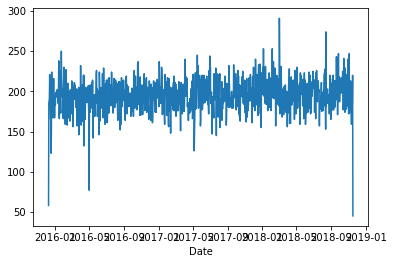

In [78]:
df[df['Reason']=='EMS'].groupby('Date').count()['twp'].plot()

In [79]:
#Agora vamos continuar a criar mapas de calor com seaborn e nossos dados.Em primeiro lugar,devemos reestruturar o quadro de 
#dados para que as colunas se tornem oras e o índice se torne Dia da Semana.há muitas maneiras de fazer isso, mas eu 
#recomendaria combinar o groupby com o método unstack. Consulte as soluções se você ficar preso nisso.

In [84]:
dayHour = df.groupby(by=['Day of Week', 'Hour']).count()['twp'].unstack()

In [85]:
dayHour

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,1184,998,930,832,820,1050,1671,2688,3185,3295,...,4148,4512,4711,4488,3615,3254,2787,2445,2209,1861
Sat,1513,1332,1205,1009,935,984,1230,1640,2211,2766,...,3479,3284,3347,3272,3174,3033,2631,2430,2071,1911
Sun,1519,1330,1257,1033,951,940,1119,1566,1933,2421,...,2992,2828,2854,2872,2829,2677,2361,1994,1632,1468
Tue,1086,916,812,782,823,1075,1806,2912,3649,3560,...,3829,4087,4265,4393,3751,2959,2533,2146,1705,1349
Wed,1021,951,807,793,711,1040,1762,3059,3565,3528,...,3932,4149,4441,4486,3609,2927,2643,2232,1793,1396
mon,1207,971,857,784,871,1124,1729,2828,3586,3684,...,3547,3975,4061,4002,3511,2821,2418,2004,1698,1282
thu,1115,873,918,773,783,1091,1799,2912,3468,3457,...,3903,4139,4053,4410,3578,2921,2577,2230,1784,1484


In [86]:
#Agora crie um HeatMap usando esse novo DataFrame

<AxesSubplot:xlabel='Hour', ylabel='Day of Week'>

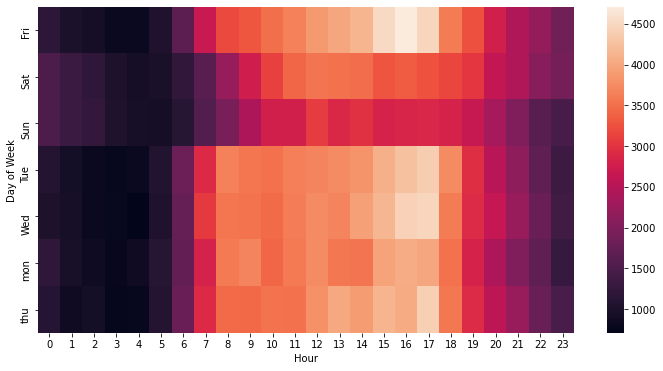

In [91]:
plt.figure(figsize=(12, 6))
sns.heatmap(dayHour)

In [92]:
#Agora crie um clustermap usando este DataFrame

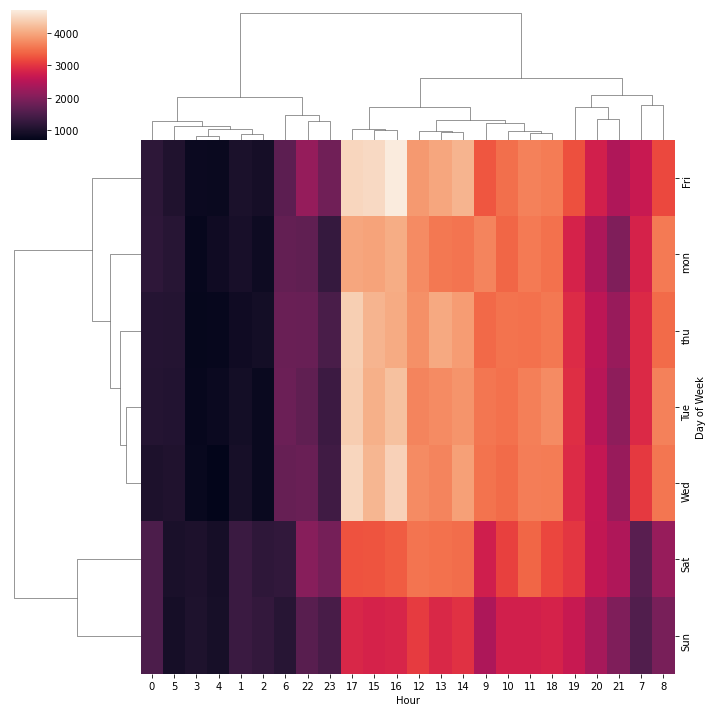

In [94]:
sns.clustermap(dayHour)

In [95]:
#Agora repita estes mesmos plots e operaçãoes usando um DataFrame que mostra o mês como coluna

In [97]:
dayHour = df.groupby(by=['Day of Week', 'Month']).count()['twp'].unstack()

<AxesSubplot:xlabel='Month', ylabel='Day of Week'>

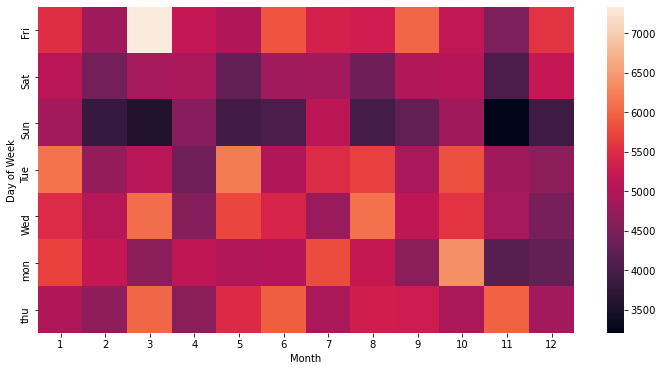

In [98]:
plt.figure(figsize=(12, 6))
sns.heatmap(dayHour)

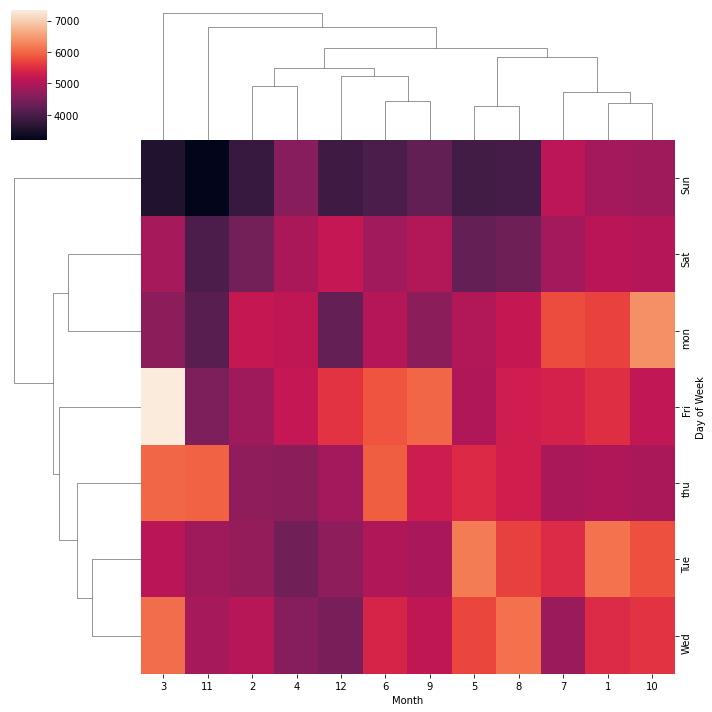

In [99]:
sns.clustermap(dayHour)